Step :  0 
 은닉층(layer1) =  [[0.4382287  0.08327261 0.76781744 0.5600835  0.36558968 0.4397301
  0.8830745  0.6141081  0.19997679 0.23990355]
 [0.5438242  0.13966005 0.83280677 0.4310576  0.51059735 0.652431
  0.83461624 0.64644855 0.06326889 0.40536544]
 [0.7359037  0.25635862 0.92417824 0.32449865 0.62331957 0.66838145
  0.96887535 0.49460363 0.17810819 0.21286961]
 [0.8098271  0.38121188 0.9483456  0.22231741 0.74974304 0.82819283
  0.9541289  0.5292827  0.0553164  0.36873132]] 
 출력층(layer2) =  [[0.42575815]
 [0.3925665 ]
 [0.49990606]
 [0.5042688 ]] 
 출력층 편향(b2) =  [0.10770824] 
 비용(cost) =  0.7212026 
 예측값(prediction) =  [[0.]
 [0.]
 [0.]
 [1.]] 
 정확도(accuracy) =  0.25 
_________________________________
Step :  200 
 은닉층(layer1) =  [[0.4608496  0.07890042 0.7673025  0.5190016  0.3479196  0.40524438
  0.88916504 0.6120383  0.2001598  0.2393173 ]
 [0.60939896 0.09735824 0.81078196 0.32817253 0.47380206 0.5788082
  0.86742085 0.6392744  0.0632236  0.40057176]
 [0.7604627  0.21164358 0

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

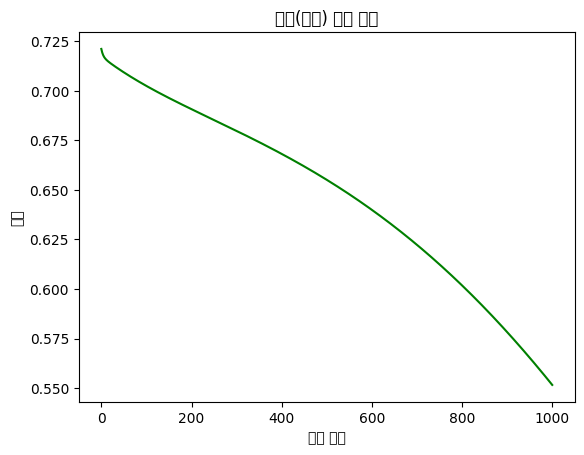

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# XOR 문제 데이터 설정
# 입력 데이터: [0,0], [0,1], [1,0], [1,1]
x_data = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype=np.float32)
# 타겟 데이터: [0], [1], [1], [0] (XOR 연산 결과)
y_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

out_data = np.array([], dtype=np.float32)

# 첫 번째 레이어 (은닉층) 가중치와 편향 초기화
# [2, 10] 크기: 입력 특성 2개, 은닉층 뉴런 10개
W1 = tf.Variable(tf.random.normal([2, 10]))  # 은닉층 가중치
b1 = tf.Variable(tf.random.normal([10]))     # 은닉층 편향

# 두 번째 레이어 (출력층) 가중치와 편향 초기화
# [10, 1] 크기: 은닉층 뉴런 10개, 출력 뉴런 1개
W2 = tf.Variable(tf.random.normal([10, 1]))  # 출력층 가중치
b2 = tf.Variable(tf.random.normal([1]))      # 출력층 편향

# 학습률 설정
learning_rate = 0.1

# 로지스틱 회귀 함수 정의 (경사 하강법을 사용한 학습)
def logisticRegression():
  # 자동 미분을 위한 GradientTape 사용
  with tf.GradientTape() as tape:
    # 순방향 전파 (Forward propagation)
    # 1) 입력층 -> 은닉층
    layer1 = tf.sigmoid(tf.matmul(x_data, W1) + b1)  # 시그모이드 활성화 함수 적용

    # 2) 은닉층 -> 출력층
    layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)  # 시그모이드 활성화 함수 적용

    # 이진 크로스 엔트로피 손실 함수 계산
    # y*log(y_pred) + (1-y)*log(1-y_pred)의 평균을 구함
    cost = -tf.reduce_mean(y_data * tf.math.log(layer2) + (1 - y_data) * tf.math.log(1 - layer2))

    # 역전파 (Backpropagation)
    # 비용 함수에 대한 각 변수(W2, b2, W1, b1)의 기울기 계산
    gradients = tape.gradient(cost, (W2, b2, W1, b1))

    # 확률적 경사 하강법(SGD)을 사용하여 가중치와 편향 업데이트
    tf.optimizers.SGD(learning_rate).apply_gradients(zip(gradients, (W2, b2, W1, b1)))

# 비용값을 저장할 리스트
cost_val = []

# 학습 반복 (1001번)
for step in range(1001):
  # 로지스틱 회귀 함수 호출 (가중치 업데이트)
  logisticRegression()

  # 현재 가중치와 편향으로 예측 수행
  # 1) 은닉층 계산
  layer1 = tf.sigmoid(tf.matmul(x_data, W1) + b1)

  # 2) 출력층 계산
  layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

  # 현재 모델의 비용 계산
  cost = -tf.reduce_mean(y_data * tf.math.log(layer2) + (1 - y_data) * tf.math.log(1 - layer2))
  cost_val.append(cost)  # 비용값 저장

  # 예측 결과 이진화 (0.5보다 크면 1, 작으면 0)
  prediction = tf.cast(layer2 > 0.5, dtype=tf.float32)

  # 정확도 계산: 예측값과 실제값이 같은 비율
  accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_data), dtype=np.float32))

  # 200단계마다 학습 상태 출력
  if step % 200 == 0:
    print("Step : ", step,
          "\n 은닉층(layer1) = ", layer1.numpy(),  # 은닉층 출력값 추가
          "\n 출력층(layer2) = ", layer2.numpy(),
          "\n 출력층 편향(b2) = ", b2.numpy(),
          "\n 비용(cost) = ", cost.numpy(),
          "\n 예측값(prediction) = ", prediction.numpy(),
          "\n 정확도(accuracy) = ", accuracy.numpy(),
          "\n_________________________________")

# 학습 과정에서의 비용 변화 그래프 출력
plt.plot(range(len(cost_val)), cost_val, color='green')
plt.title('비용(손실) 함수 변화')
plt.xlabel('학습 단계')
plt.ylabel('비용')
plt.show()